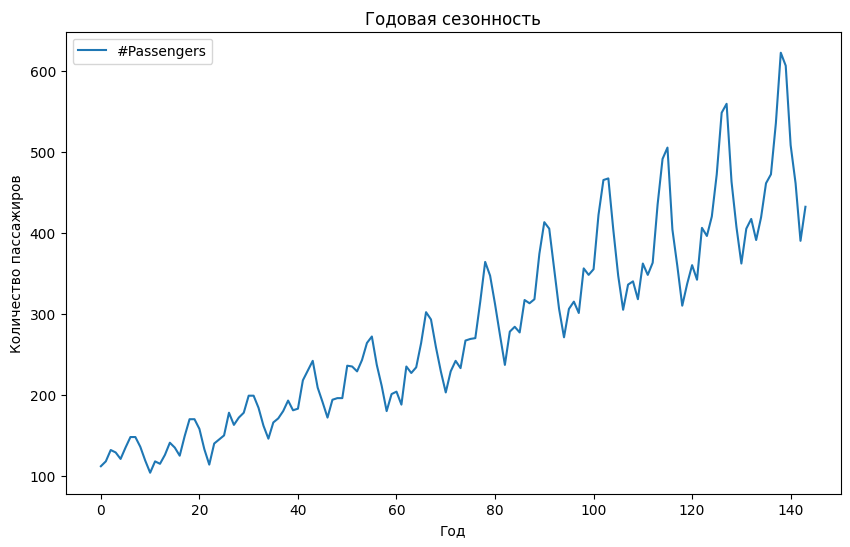

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


passenger_data = pd.read_csv('/content/drive/MyDrive/passengers.csv', parse_dates=['Month'])
passenger_data2 = pd.read_csv('/content/drive/MyDrive/passengers.csv', parse_dates=['Month'])

# Заполнение пропусков в passengers2.csv с использованием интерполяции
passenger_data2['#Passengers'] = passenger_data2['#Passengers'].interpolate()
data = passenger_data2
data['Month'] = pd.to_datetime(data['Month'])


plt.figure(figsize=(10, 6))
data['#Passengers'].plot(label='#Passengers')
plt.title('Годовая сезонность')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()


# Годовая сезонность: Наблюдается увеличение количества пассажиров в летние месяцы и снижение в зимние месяцы.


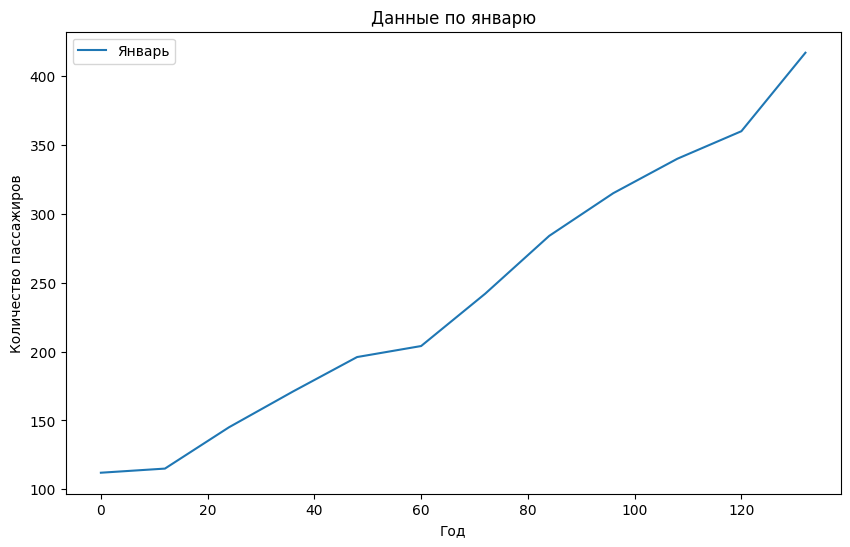

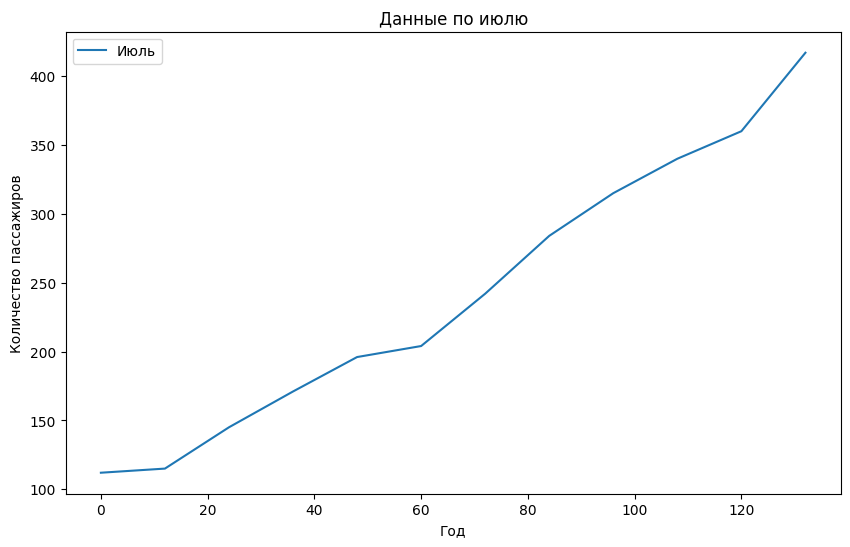

In [ ]:
# Январь
january_data = data[data['Month'].dt.month == 1]
plt.figure(figsize=(10, 6))
january_data['#Passengers'].plot(label='Январь')
plt.title('Данные по январю')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Июль
july_data = data[data['Month'].dt.month == 1]
plt.figure(figsize=(10, 6))
july_data['#Passengers'].plot(label='Июль')
plt.title('Данные по июлю')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

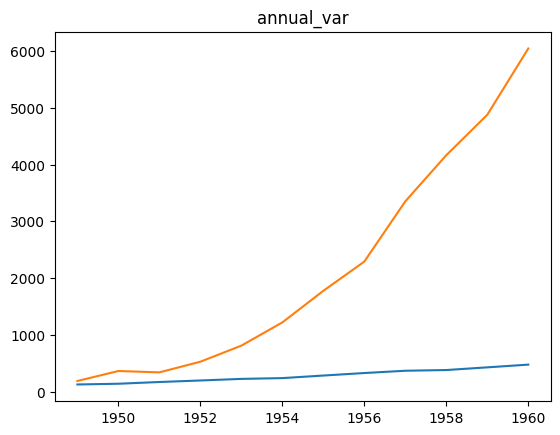

In [ ]:
# Среднее и дисперсия по данным внутри каждого года
data['Year'] = data['Month'].dt.year
annual_mean = data.groupby('Year')['#Passengers'].mean()
annual_var = data.groupby('Year')['#Passengers'].var()

plt.title('annual_mean')
plt.plot(annual_mean)
plt.show

plt.title('annual_var')
plt.plot(annual_var)
plt.show()


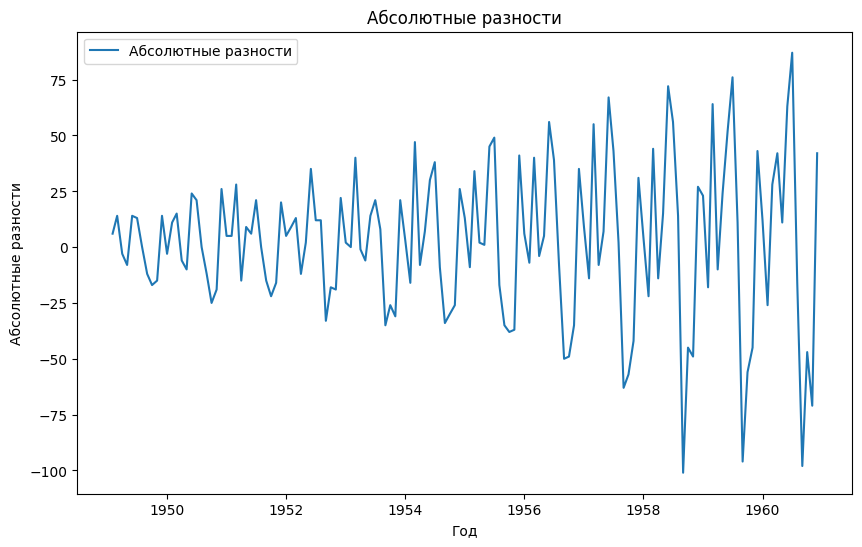

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Абсолютные разности
data['absolute_diff'] = data['#Passengers'].diff()

# График абсолютных разностей
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['absolute_diff'], label='Абсолютные разности')
plt.title('Абсолютные разности')
plt.xlabel('Год')
plt.ylabel('Абсолютные разности')
plt.legend()
plt.show()


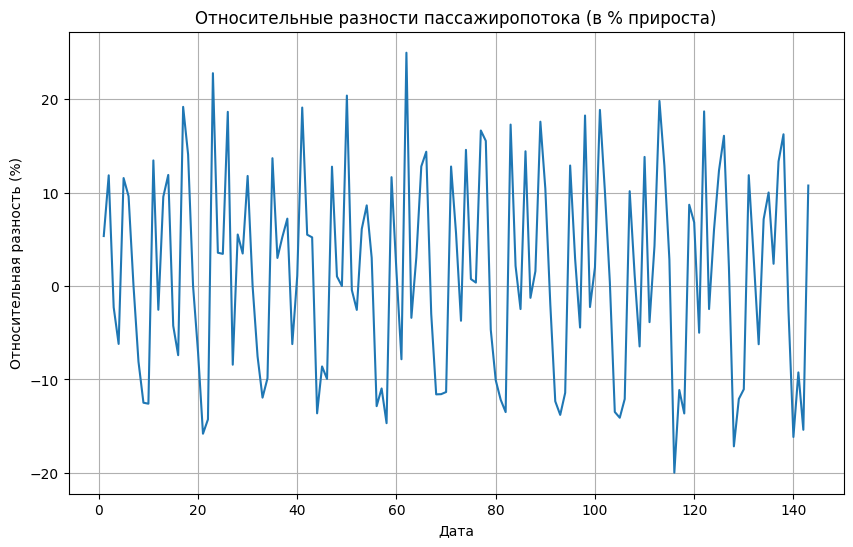

In [16]:
# Относительные разности (в % прироста)
data['Relative Difference'] = data['#Passengers'].pct_change() * 100
plt.figure(figsize=(10, 6))
passenger_data['Relative Difference'].plot(kind='line')
plt.title('Относительные разности пассажиропотока (в % прироста)')
plt.xlabel('Дата')
plt.ylabel('Относительная разность (%)')
plt.grid(True)
plt.show()
print('Изучив график можно заметить, что теория о сезонности подтверждается, так как если сравнить годовую сезонность среднего пассажиропотока, можно заметить ту самую зависимость.')

In [6]:


# Описание относительной разницы
print('Изучив график можно заметить, что теория о сезонности подтверждается, так как если сравнить годовую сезонность среднего пассажиропотока, можно заметить ту самую зависимость.')

# а) Понижение частоты дискретизации до года (квартала)
yearly_data = passenger_data['#Passengers'].resample('Y').sum()
quarterly_data = passenger_data['#Passengers'].resample('Q').sum()

plt.figure(figsize=(10, 6))
yearly_data.plot(kind='line')
plt.title('Годовая дискретизация пассажиропотока')
plt.xlabel('Год')
plt.ylabel('Суммарное количество пассажиров')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
quarterly_data.plot(kind='line')
plt.title('Квартальная дискретизация пассажиропотока')
plt.xlabel('Квартал')
plt.ylabel('Суммарное количество пассажиров')
plt.grid(True)
plt.show()

# Описание графиков годовой и квартальной дискретизации
print('Сравнивая два графика годовой и квартальной дискретизации, можно заметить, что пассажиропоток постоянно возрастал, имея одинаковую сезонную изменчивость.')

# б) Повышение частоты дискретизации до дня (недели)
# Для повышения частоты дискретизации до дня или недели, данные должны быть доступны в соответствующем формате
# В данном случае, это нецелесообразно, так как данные предоставлены в месячном формате

# (*) Выполнение заданий 1-5 для неполного датасета passengers2.csv
# Повторяем аналогичные шаги для passenger_data2

# 1. Описание годовой сезонности (график и словесное описание)
passenger_data2['Year'] = passenger_data2.index.year
passenger_data2['Month'] = passenger_data2.index.month
seasonality2 = passenger_data2.groupby('Month')['passenger_count'].mean()

plt.figure(figsize=(10, 6))
seasonality2.plot(kind='line')
plt.title('Годовая сезонность пассажиропотока (восполненные данные)')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество пассажиров')
plt.grid(True)
plt.show()

# Словесное описание годовой сезонности для восполненных данных
print("Годовая сезонность для восполненных данных показывает, что количество пассажиров увеличивается в летние месяцы и снижается в зимние месяцы.")

# 2. Исследование данных по отдельному месяцу
# а) январь по разным годам
january_data2 = passenger_data2[passenger_data2.index.month == 1]
plt.figure(figsize=(10, 6))
plt.plot(january_data2.index.year, january_data2['passenger_count'], marker='o')
plt.title('Количество пассажиров в январе по годам (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()

# б) июль по разным годам
july_data2 = passenger_data2[passenger_data2.index.month == 7]
plt.figure(figsize=(10, 6))
plt.plot(july_data2.index.year, july_data2['passenger_count'], marker='o')
plt.title('Количество пассажиров в июле по годам (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()

# Среднее и дисперсия по данным внутри каждого года
yearly_mean2 = passenger_data2.groupby('Year')['passenger_count'].mean()
yearly_var2 = passenger_data2.groupby('Year')['passenger_count'].var()

print("Среднее количество пассажиров по годам (восполненные данные):\n", yearly_mean2)
print("Дисперсия количества пассажиров по годам (восполненные данные):\n", yearly_var2)

# а) Абсолютные разности по данным (между соседними месяцами)
passenger_data2['Absolute Difference'] = passenger_data2['passenger_count'].diff()
plt.figure(figsize=(10, 6))
passenger_data2['Absolute Difference'].plot(kind='line')
plt.title('Абсолютные разности пассажиропотока (восполненные данные)')
plt.xlabel('Дата')
plt.ylabel('Абсолютная разность')
plt.grid(True)
plt.show()

# б) Относительные разности (в % прироста)
passenger_data2['Relative Difference'] = passenger_data2['passenger_count'].pct_change() * 100
plt.figure(figsize=(10, 6))
passenger_data2['Relative Difference'].plot(kind='line')
plt.title('Относительные разности пассажиропотока (в % прироста) (восполненные данные)')
plt.xlabel('Дата')
plt.ylabel('Относительная разность (%)')
plt.grid(True)
plt.show()

# а) Понижение частоты дискретизации до года (квартала)
yearly_data2 = passenger_data2['passenger_count'].resample('Y').sum()
quarterly_data2 = passenger_data2['passenger_count'].resample('Q').sum()

plt.figure(figsize=(10, 6))
yearly_data2.plot(kind='line')
plt.title('Годовая дискретизация пассажиропотока (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Суммарное количество пассажиров')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
quarterly_data2.plot(kind='line')
plt.title('Квартальная дискретизация пассажиропотока (восполненные данные)')
plt.xlabel('Квартал')
plt.ylabel('Суммарное количество пассажиров')
plt.grid(True)
plt.show()

# Сравнение результатов исследований
print("Результаты исследований для полных и восполненных данных показывают схожие тенденции, но могут быть небольшие различия из-за интерполяции пропущенных значений.")


ValueError: 'Month' is both an index level and a column label, which is ambiguous.